## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Data

In [120]:
df=pd.read_csv("E:/Ritz_Jager_Data.csv")

In [121]:
df.shape

(119390, 32)

In [122]:
df.head()

hotel_type  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                1/7/2015  
1                1/7/2015  
2                2/7/2015  
3                2/7/2015  
4                3/7/2015  

[5 rows x 32 columns]

## Pre-Processing Data

In [123]:
df.dtypes

hotel_type                         object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal_type                          object
country_origin                     object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [124]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"],format="%d/%m/%Y")

In [125]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [126]:
df["meal_type"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [127]:
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [128]:
df["children"].median()

0.0

In [129]:
df = df.fillna({"children:": 0.0,"country_origin": "Unknown", "agent": 0, 
                "company": 0})
df["meal_type"]=df["meal_type"].replace("Undefined", "SC")
zero= list(df[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df=df.drop(df.index[zero])

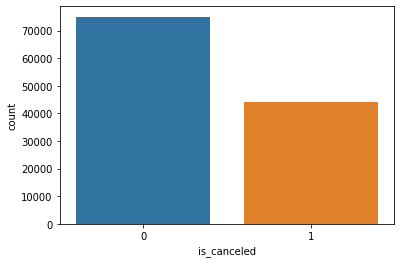

In [130]:
sns.countplot(df["is_canceled"])

In [131]:
df_total=df
df_noncancel=df[df["is_canceled"] == 0]
resort_total= df[df["hotel_type"] == "Resort Hotel"]
city_total= df[df["hotel_type"] == "City Hotel"]
resort_noncancel= df[(df["hotel_type"] == "Resort Hotel") & 
                     (df["is_canceled"] == 0)]
city_noncancel= df[(df["hotel_type"] == "City Hotel") & 
                   (df["is_canceled"] == 0)]

## Where do the guests come from?

### All guests including those canceled

In [132]:
df_total["country_origin"].value_counts().head()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
Name: country_origin, dtype: int64

In [63]:
country = pd.DataFrame(df_total["country_origin"].value_counts())
country=country.rename(columns={"country_origin": "Number of Guests"})
total_guests = country["Number of Guests"].sum()
country["Guests in %"] = round(country["Number of Guests"] / total_guests 
                               * 100, 3)
country["country_origin"] = country.index
guest_map = px.choropleth(country,
                    locations=country.index,
                    color=country["Guests in %"], 
                    hover_name=country.index, 
                    color_continuous_scale="Viridis",
                    title="Country Origin of Guests")
guest_map.show()

### All guests do not include canceled ones

In [133]:
df_noncancel["country_origin"].value_counts().head()

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
Name: country_origin, dtype: int64

In [65]:
country = pd.DataFrame(df_noncancel["country_origin"].value_counts())
country=country.rename(columns={"country_origin": "Number of Guests"})
total_guests = country["Number of Guests"].sum()
country["Guests in %"] = round(country["Number of Guests"] / total_guests 
                               * 100, 3)
country["country_origin"] = country.index
guest_map = px.choropleth(country,
                    locations=country.index,
                    color=country["Guests in %"], 
                    hover_name=country.index, 
                    color_continuous_scale="Viridis",
                    title="Country Origin of Guests")
guest_map.show()

### All Resort Hotel guests are not included as canceled

In [134]:
resort_noncancel["country_origin"].value_counts().head()

PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
Name: country_origin, dtype: int64

In [67]:
country = pd.DataFrame(resort_noncancel["country_origin"].value_counts())
country=country.rename(columns={"country_origin": "Number of Guests"})
total_guests = country["Number of Guests"].sum()
country["Guests in %"] = round(country["Number of Guests"] / total_guests 
                               * 100, 3)
country["country_origin"] = country.index
guest_map = px.choropleth(country,
                    locations=country.index,
                    color=country["Guests in %"], 
                    hover_name=country.index, 
                    color_continuous_scale="Viridis",
                    title="Country Origin of Guests")
guest_map.show()

### All City Hotel guests are not included in the canceled one

In [135]:
city_noncancel["country_origin"].value_counts().head()

PRT    10793
FRA     7069
DEU     5010
GBR     3746
ESP     3278
Name: country_origin, dtype: int64

In [69]:
country = pd.DataFrame(city_noncancel["country_origin"].value_counts())
country=country.rename(columns={"country_origin": "Number of Guests"})
total_guests = country["Number of Guests"].sum()
country["Guests in %"] = round(country["Number of Guests"] / total_guests 
                               * 100, 3)
country["country_origin"] = country.index
guest_map = px.choropleth(country,
                    locations=country.index,
                    color=country["Guests in %"], 
                    hover_name=country.index, 
                    color_continuous_scale="Viridis",
                    title="Country Origin of Guests")
guest_map.show()

## How much do guests pay for a room per night?

In [137]:
resort_noncancel["adr_pp"] = resort_noncancel["adr"]/(resort_noncancel["adults"] + resort_noncancel["children"])
city_noncancel["adr_pp"] = city_noncancel["adr"]/(city_noncancel["adults"] + city_noncancel["children"])

print("""From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_noncancel["adr_pp"].mean(),city_noncancel["adr_pp"].mean()))

From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



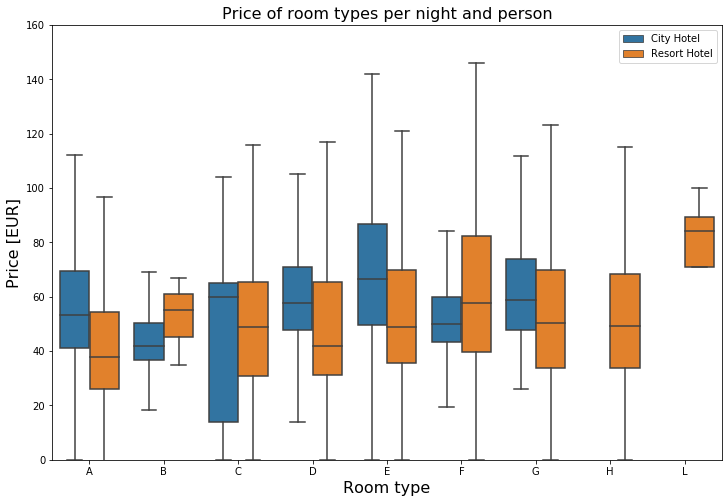

In [139]:
df_noncancel["adr_pp"] = df_noncancel["adr"] / (df_noncancel["adults"] +
                                                df_noncancel["children"])
room_prices = df_noncancel[["hotel_type", "reserved_room_type",
                            "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel_type",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



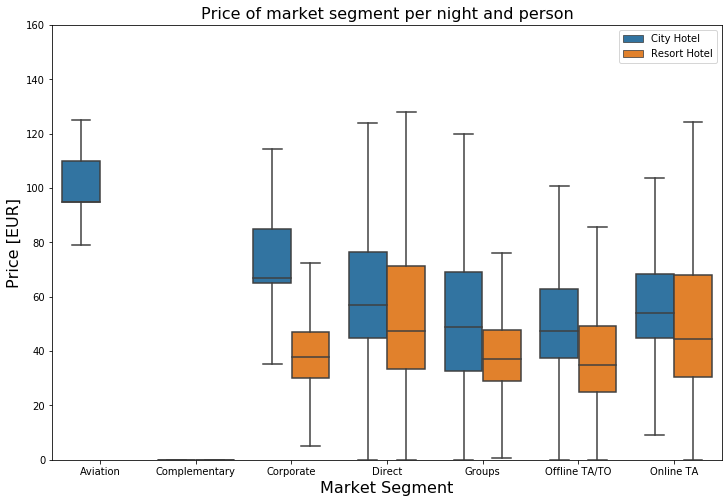

In [140]:
df_noncancel["adr_pp"] = df_noncancel["adr"] / (df_noncancel["adults"] + 
                                                df_noncancel["children"])
room_prices = df_noncancel[["hotel_type", "market_segment", 
                            "adr_pp"]].sort_values("market_segment")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="market_segment",
            y="adr_pp",
            hue="hotel_type",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of market segment per night and person", fontsize=16)
plt.xlabel("Market Segment", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



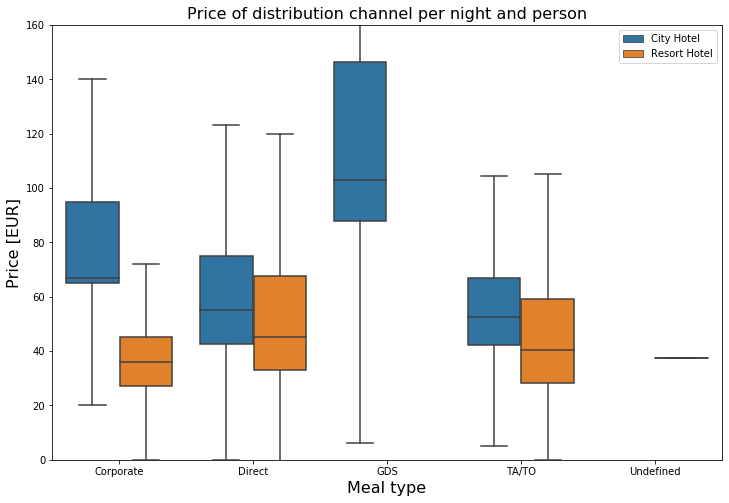

In [141]:
df_noncancel["adr_pp"] = df_noncancel["adr"] / (df_noncancel["adults"] +
                                                df_noncancel["children"])
room_prices = df_noncancel[["hotel_type", "distribution_channel",
                            "adr_pp"]].sort_values("distribution_channel")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="distribution_channel",
            y="adr_pp",
            hue="hotel_type",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of distribution channel per night and person", fontsize=16)
plt.xlabel("Meal type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

## How does the price per night vary over the year?

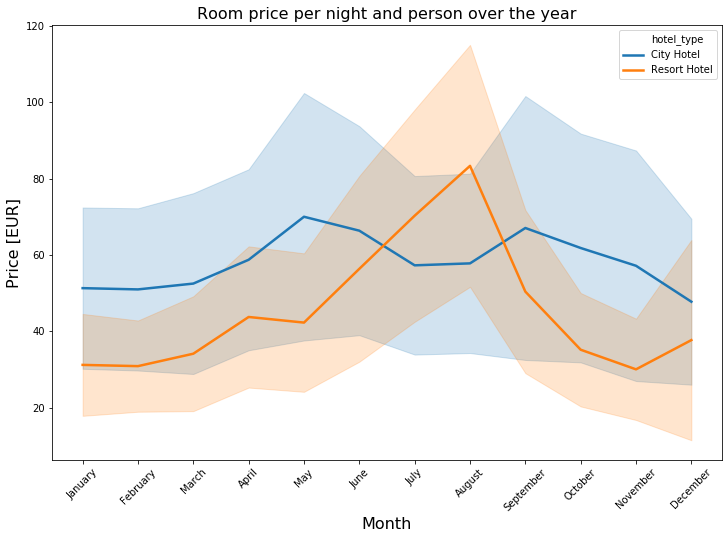

In [142]:
room_prices_mothly = df_noncancel[["hotel_type", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"],
                                                          categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel_type", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel_type", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

In [143]:
over_time=df_noncancel.groupby([df_noncancel["reservation_status_date"].dt.year,
                                df_noncancel["reservation_status_date"].dt.month]).agg({"adr_pp":"mean"})
over_time

adr_pp
reservation_status_date reservation_status_date           
2015                    7                        53.345439
                        8                        57.798528
                        9                        60.306470
                        10                       50.067665
                        11                       39.838142
                        12                       34.545492
2016                    1                        43.277637
                        2                        40.022822
                        3                        42.314265
                        4                        47.052320
                        5                        53.542732
                        6                        59.708150
                        7                        59.003203
                        8                        66.773613
                        9                        64.045491
                        10                       55.411306
                        11                       48.783655
                        12                       42.278126
2017                    1                        47.565549
                        2                        43.563497
                        3                        48.376643
                        4                        57.119372
                        5                        65.820227
                        6                        66.938421
                        7                        66.564596
                        8                        74.875745
                        9                        79.573823

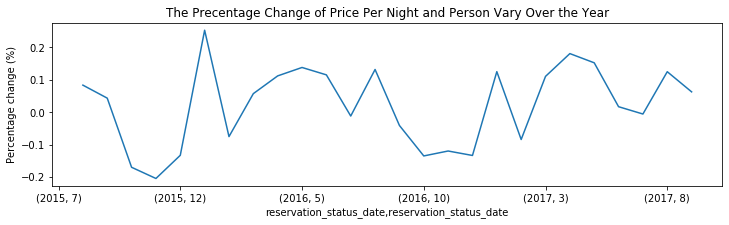

In [149]:
avgmonth=over_time['adr_pp'].pct_change()
plt.figure(figsize=(12,3))
plt.title('The Precentage Change of Price Per Night and Person Vary Over the Year')
plt.xlabel('Month and Year')
plt.ylabel('Percentage change (%)')
avgmonth.plot()

Text(0, 0.5, 'Price')

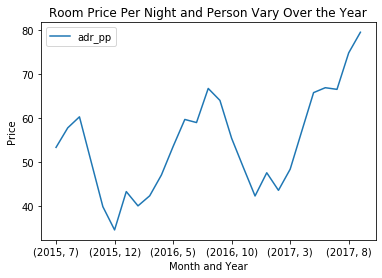

In [152]:
over_time.plot()
plt.title('Room Price Per Night and Person Vary Over the Year')
plt.xlabel('Month and Year')
plt.ylabel('Price')

## Which are the busiest months?

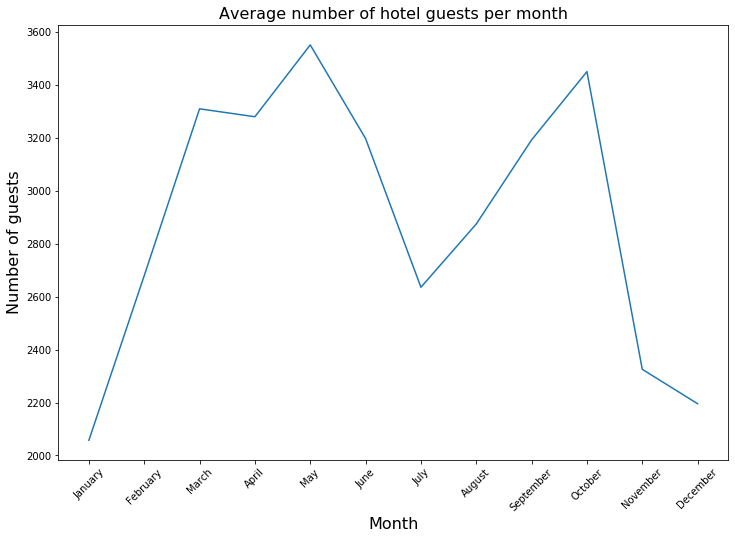

In [154]:
total_guests_monthly = df_noncancel.groupby("arrival_date_month")["hotel_type"].count()

total_guest_data = pd.DataFrame({"month": list(total_guests_monthly.index),
                    "guests": list(total_guests_monthly.values)})

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
total_guest_data["month"] = pd.Categorical(total_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
total_guest_data.loc[(total_guest_data["month"] == "July") | (total_guest_data["month"] == "August"),
                    "guests"] /= 3
total_guest_data.loc[~((total_guest_data["month"] == "July") | (total_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", data=total_guest_data, sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

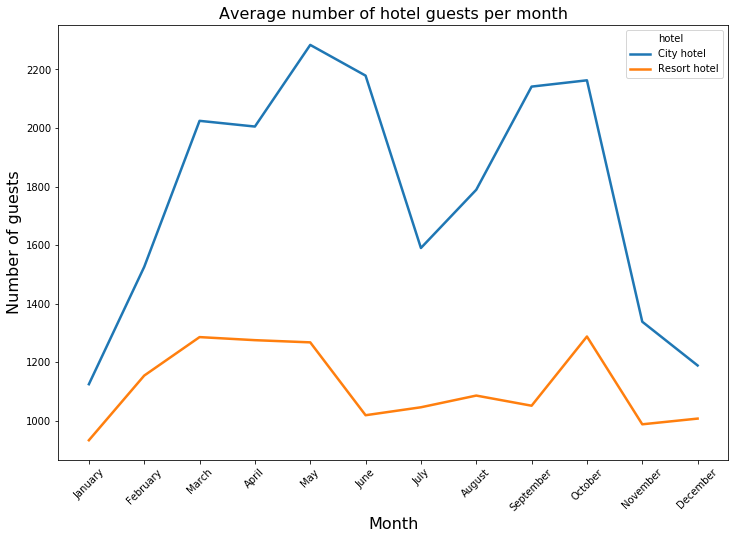

In [155]:
resort_guests_monthly = resort_noncancel.groupby("arrival_date_month")["hotel_type"].count()
city_guests_monthly = city_noncancel.groupby("arrival_date_month")["hotel_type"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})

full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

## How long do people stay at the hotels?

In [87]:
# Create a DateFrame with the relevant data:
resort_noncancel["total_nights"] = resort_noncancel["stays_in_weekend_nights"] + resort_noncancel["stays_in_week_nights"]
city_noncancel["total_nights"] = city_noncancel["stays_in_weekend_nights"] + city_noncancel["stays_in_week_nights"]

num_nights_res = list(resort_noncancel["total_nights"].value_counts().index)
num_bookings_res = list(resort_noncancel["total_nights"].value_counts())
rel_bookings_res = resort_noncancel["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(city_noncancel["total_nights"].value_counts().index)
num_bookings_cty = list(city_noncancel["total_nights"].value_counts())
rel_bookings_cty = city_noncancel["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "num_bookings":num_bookings_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "num_bookings":num_bookings_cty,
                           "rel_num_bookings": rel_bookings_cty})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
res_nights.head()

hotel  num_nights  num_bookings  rel_num_bookings
1  Resort hotel           1          6579         22.743458
2  Resort hotel           2          4488         15.514917
7  Resort hotel           7          4434         15.328240
3  Resort hotel           3          3828         13.233311
4  Resort hotel           4          3321         11.480624

In [89]:
cty_nights.head()

hotel  num_nights  num_bookings  rel_num_bookings
3  City hotel           3         11889         25.798542
2  City hotel           2         10983         23.832567
1  City hotel           1          9155         19.865897
4  City hotel           4          7694         16.695599
5  City hotel           5          3210          6.965541

In [97]:
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.92 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


## Bookings by market segment

### All bookings

In [28]:
df["market_segment"].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

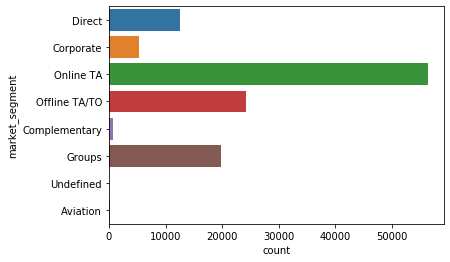

In [29]:
sns.countplot(y=df["market_segment"],orient="h")

### Booking non cancel

In [30]:
df_noncancel["market_segment"].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

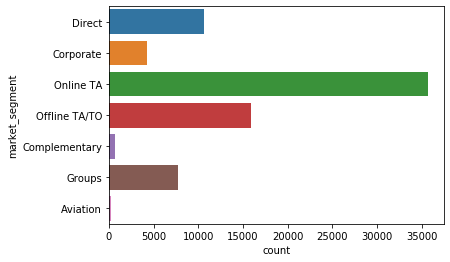

In [31]:
sns.countplot(y=df_noncancel["market_segment"],orient="h")

### Resort Hotel non cancel

In [32]:
resort_noncancel["market_segment"].value_counts()

Online TA        11481
Offline TA/TO     6334
Direct            5632
Groups            3358
Corporate         1954
Complementary      168
Name: market_segment, dtype: int64

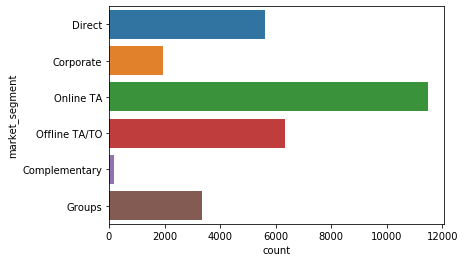

In [33]:
sns.countplot(y=resort_noncancel["market_segment"],orient="h")

### City Hotel non cancel

In [34]:
city_noncancel["market_segment"].value_counts()

Online TA        24192
Offline TA/TO     9546
Direct            5016
Groups            4339
Corporate         2337
Complementary      471
Aviation           183
Name: market_segment, dtype: int64

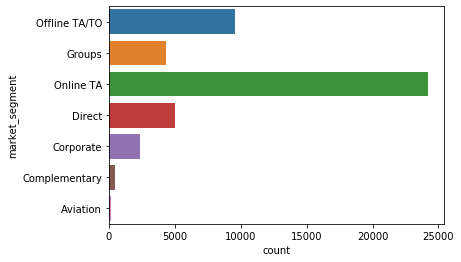

In [35]:
sns.countplot(y=city_noncancel["market_segment"],orient="h")

## How many bookings were cancelled?

In [36]:
cancel1=df[df["is_canceled"]==1]["is_canceled"].count()
percent1=cancel1/len(df)*100
print("The total canceled orders is equal to "+str(cancel1)+" or "+str(round(percent1,2))+"%")

The total canceled orders is equal to 44199 or 37.08%


In [37]:
cancel2=df[(df["is_canceled"]==1) & (df["hotel_type"]=="Resort Hotel")]["is_canceled"].count()
percent2=cancel2/len(df[df["hotel_type"]=="Resort Hotel"])*100
print("The total canceled orders for Resort Hotel is equal to "+str(cancel2)+" or "+str(round(percent2,2))+"%")

The total canceled orders for Resort Hotel is equal to 11120 or 27.77%


In [38]:
cancel3=df[(df["is_canceled"]==1) & (df["hotel_type"]=="City Hotel")]["is_canceled"].count()
percent3=cancel3/len(df[df["hotel_type"]=="City Hotel"])*100
print("The total canceled orders for City Hotel is equal to "+str(cancel3)+" or "+str(round(percent3,2))+"%")

The total canceled orders for City Hotel is equal to 33079 or 41.79%


## Which month has the highest number of cancellations?

### All Hotel Type

In [39]:
df_group3=df.groupby(["arrival_date_month"]).agg({"is_canceled":"sum","arrival_date_month":"count"})
df_group3=df_group3.rename(columns={"is_canceled":"Number of Cancellations","arrival_date_month":"Number of Bookings"})
df_group3["Percent"]=df_group3["Number of Cancellations"]/df_group3["Number of Bookings"]
df_group3.sort_values("Percent",ascending=False)

Number of Cancellations  Number of Bookings   Percent
arrival_date_month                                                       
June                                   4534               10929  0.414860
April                                  4518               11078  0.407835
May                                    4677               11780  0.397029
September                              4115               10500  0.391905
October                                4246               11147  0.380910
August                                 5237               13861  0.377823
July                                   4737               12644  0.374644
December                               2368                6759  0.350348
February                               2693                8052  0.334451
March                                  3148                9768  0.322277
November                               2120                6771  0.313100
January                                1806                5921  0.305016

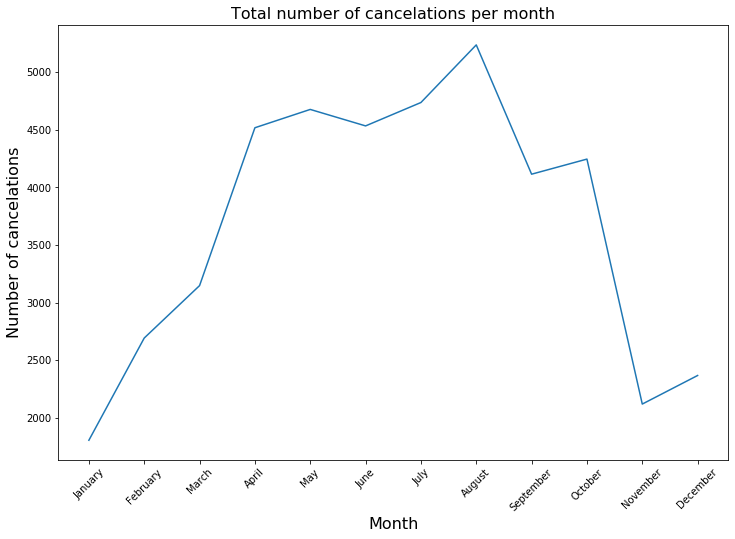

In [40]:
df_group3=df_group3.reset_index()
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_group3["arrival_date_month"] = pd.Categorical(df_group3["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Number of Cancellations", data=df_group3)
plt.title("Total number of cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of cancelations", fontsize=16)
plt.show()

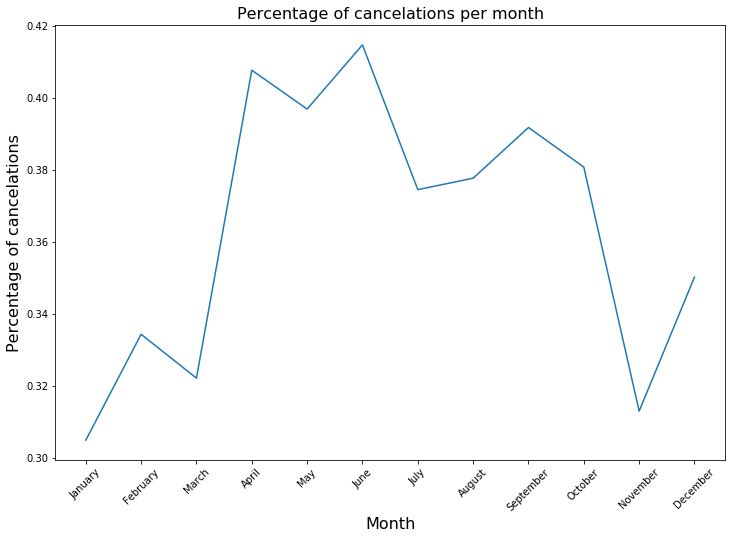

In [41]:
df_group3=df_group3.reset_index()
df_group3["arrival_date_month"] = pd.Categorical(df_group3["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Percent", data=df_group3)
plt.title("Percentage of cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Percentage of cancelations", fontsize=16)
plt.show()

### Resort Hotel Type

In [98]:
df_group4=df[df["hotel_type"]=="Resort Hotel"].groupby(["arrival_date_month"]).agg({"is_canceled":"sum","arrival_date_month":
                                                                                    "count"})
df_group4=df_group4.rename(columns={"is_canceled":"Number of Cancellations","arrival_date_month":"Number of Bookings"})
df_group4["Percent"]=df_group4["Number of Cancellations"]/df_group4["Number of Bookings"]
df_group4.sort_values("Percent",ascending=False)

Number of Cancellations  Number of Bookings   Percent
arrival_date_month                                                       
August                                 1637                4894  0.334491
June                                   1007                3044  0.330815
September                              1006                3108  0.323681
July                                   1436                4573  0.314017
April                                  1059                3609  0.293433
May                                    1024                3559  0.287721
October                                 978                3553  0.275260
February                                794                3102  0.255964
December                                631                2645  0.238563
March                                   763                3334  0.228854
November                                460                2435  0.188912
January                                 325                2191  0.148334

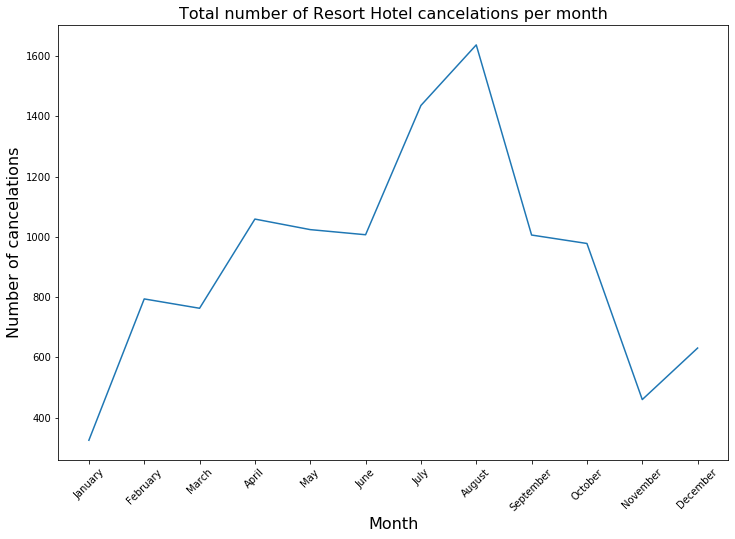

In [43]:
df_group4=df_group4.reset_index()
df_group4["arrival_date_month"] = pd.Categorical(df_group4["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Number of Cancellations", data=df_group4)
plt.title("Total number of Resort Hotel cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of cancelations", fontsize=16)
plt.show()

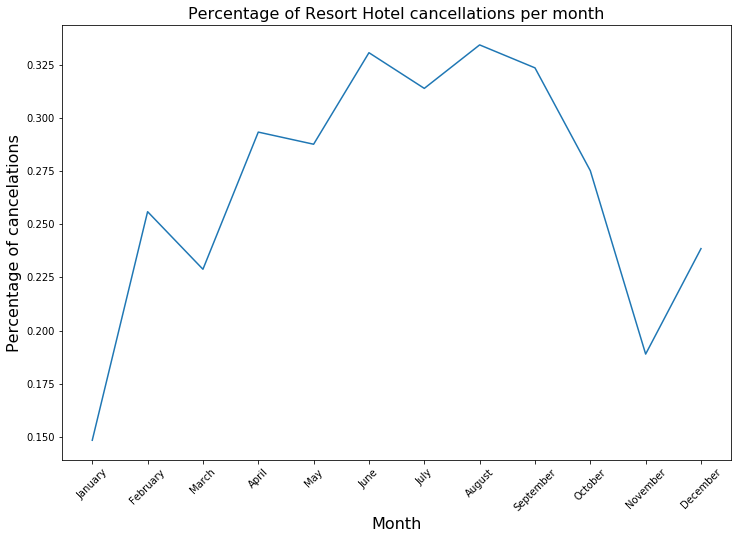

In [44]:
df_group4=df_group4.reset_index()
df_group4["arrival_date_month"] = pd.Categorical(df_group4["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Percent", data=df_group4)
plt.title("Percentage of Resort Hotel cancellations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Percentage of cancelations", fontsize=16)
plt.show()

### City Hotel Type

In [99]:
df_group5=df[df["hotel_type"]=="City Hotel"].groupby(["arrival_date_month"]).agg({"is_canceled":"sum","arrival_date_month":
                                                                                  "count"})
df_group5=df_group5.rename(columns={"is_canceled":"Number of Cancellations","arrival_date_month":"Number of Bookings"})
df_group5["Percent"]=df_group5["Number of Cancellations"]/df_group5["Number of Bookings"]
df_group5.sort_values("Percent",ascending=False)

Number of Cancellations  Number of Bookings   Percent
arrival_date_month                                                       
April                                  3459                7469  0.463114
June                                   3527                7885  0.447305
May                                    3653                8221  0.444350
October                                3268                7594  0.430340
December                               1737                4114  0.422217
September                              3109                7392  0.420590
July                                   3301                8071  0.408995
August                                 3600                8967  0.401472
January                                1481                3730  0.397051
February                               1899                4950  0.383636
November                               1660                4336  0.382841
March                                  2385                6434  0.370687

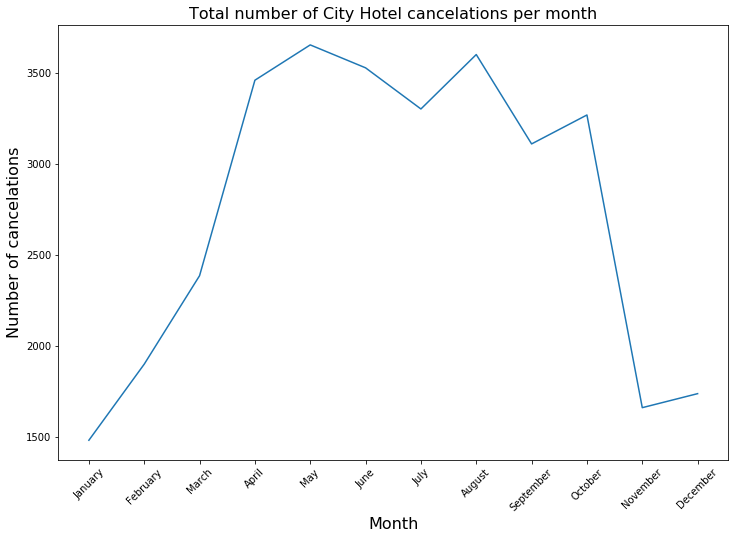

In [46]:
df_group5=df_group5.reset_index()
df_group5["arrival_date_month"] = pd.Categorical(df_group5["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Number of Cancellations", data=df_group5)
plt.title("Total number of City Hotel cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of cancelations", fontsize=16)
plt.show()

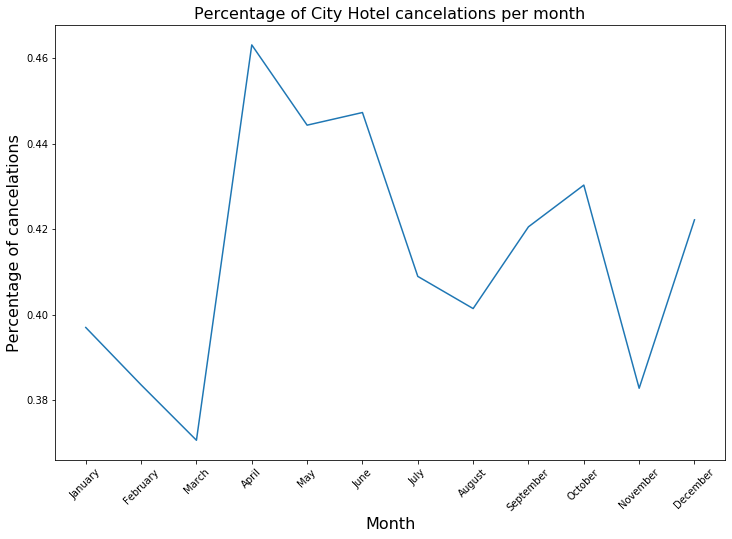

In [47]:
df_group5=df_group5.reset_index()
df_group5["arrival_date_month"] = pd.Categorical(df_group5["arrival_date_month"], categories=ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="Percent", data=df_group5)
plt.title("Percentage of City Hotel cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Percentage of cancelations", fontsize=16)
plt.show()